In [1]:
# # Run this and then restart the kernel at the start of each session to install
# # 'teotil3' in development mode
# !pip install -e /home/jovyan/projects/teotil3/

In [2]:
import nivapy3 as nivapy
import pandas as pd
import teotil3 as teo

In [3]:
eng = nivapy.da.connect_postgis()

Connection successful.


In [4]:
nve_data_year = 2023
st_yr, end_yr = 1990, 2022
years = range(st_yr, end_yr + 1)

df_list = []
for year in years:
    reg_gdf = teo.io.get_regine_geodataframe(eng, year)
    reg_gdf = teo.io.rescale_annual_flows(reg_gdf, nve_data_year, year, eng)
    reg_df = pd.DataFrame(reg_gdf[["regine", "runoff_mm/yr"]])
    reg_df.columns = ["regine", f"runoff_{year}_mm/yr"]
    reg_df.set_index("regine", inplace=True)
    df_list.append(reg_df)

df = pd.concat(df_list, axis="columns").reset_index()

out_csv = f"../../data/regine_annual_runoff_nve{nve_data_year}.csv"
df.to_csv(out_csv, index=False)

df.head()

,regine,runoff_1990_mm/yr,runoff_1991_mm/yr,runoff_1992_mm/yr,runoff_1993_mm/yr,runoff_1994_mm/yr,runoff_1995_mm/yr,runoff_1996_mm/yr,runoff_1997_mm/yr,runoff_1998_mm/yr,...,runoff_2013_mm/yr,runoff_2014_mm/yr,runoff_2015_mm/yr,runoff_2016_mm/yr,runoff_2017_mm/yr,runoff_2018_mm/yr,runoff_2019_mm/yr,runoff_2020_mm/yr,runoff_2021_mm/yr,runoff_2022_mm/yr
0,001.10,547,479,497,462,664,637,421,424,537,...,532,794,729,446,415,521,703,691,448,374
1,001.1A1,573,501,520,484,695,667,441,444,562,...,558,832,764,467,434,546,736,724,469,392
2,001.1A20,549,480,498,464,666,639,422,425,539,...,534,797,732,447,416,523,705,694,449,375
3,001.1A2A,588,515,534,497,714,685,453,456,578,...,573,855,785,480,446,561,756,744,482,402
4,001.1A2B,588,515,534,497,714,685,453,456,578,...,573,855,785,480,446,561,756,744,482,402


<Axes: >

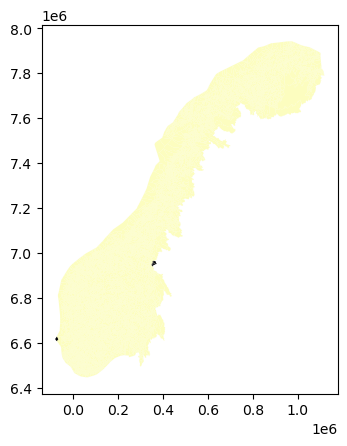

In [5]:
reg_gdf["runoff_valid"] = reg_gdf["runoff_mm/yr"] > 0
reg_gdf.plot(column="runoff_valid", categorical=True, cmap="magma")